<a href="https://colab.research.google.com/github/ihightower/my-first-binder/blob/main/pe084.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
# !pip install pandas

In [1]:
print('last saved 11nov 14:05')

last saved 11nov 14:05


In [3]:
import random
import pandas as pd
import time


In [4]:
# del logging, logger, ch, formatter
from importlib import reload
import logging
logging.shutdown()
reload(logging)


# create logger
logger = logging.getLogger('simple_example')
logger.setLevel(logging.DEBUG)

 # create console handler and set level to debug
ch = logging.StreamHandler()
ch.setLevel(logging.DEBUG)

# create formatter
#formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')

# add formatter to ch
#ch.setFormatter(formatter)

# add ch to logger
logger.addHandler(ch)


# Project Euler P084

<img src="https://projecteuler.net/project/images/p084_monopoly_board.png">




In the game, Monopoly, the standard board is set up in the following way:

Community Chest (2/16 cards):
* Advance to GO
* Go to JAIL

Chance (10/16 cards):

* Advance to GO
* Go to JAIL
* Go to C1
* Go to E3
* Go to H2
* Go to R1
* Go to next R (railway company)
* Go to next R
* Go to next U (utility company)
* Go back 3 squares.


The heart of this problem concerns the likelihood of visiting a particular square. That is, the probability of finishing at that square after a roll. For this reason it should be clear that, with the exception of G2J for which the probability of finishing on it is zero, the CH squares will have the lowest probabilities, as 5/8 request a movement to another square, and it is the final square that the player finishes at on each roll that we are interested in. We shall make no distinction between "Just Visiting" and being sent to JAIL, and we shall also ignore the rule about requiring a double to "get out of jail", assuming that they pay to get out on their next turn.

By starting at GO and numbering the squares sequentially from 00 to 39 we can concatenate these two-digit numbers to produce strings that correspond with sets of squares.

Statistically it can be shown that the three most popular squares, in order, are JAIL (6.24%) = Square 10, E3 (3.18%) = Square 24, and GO (3.09%) = Square 00. So these three most popular squares can be listed with the six-digit modal string: 102400.

If, instead of using two 6-sided dice, two 4-sided dice are used, find the six-digit modal string.

# Code Starts

## Set Monopoly Squares

In [5]:
#pe084 - Monopoly odds
lst_monopoly_squares = [
    'GO', 'A1', 'CC1', 'A2', 'T1', 'R1', 'B1', 'CH1', 'B2', 'B3', 'JAIL', 'C1',
    'U1', 'C2', 'C3', 'R2', 'D1', 'CC2', 'D2', 'D3', 'FP', 'E1', 'CH2', 'E2',
    'E3', 'R3', 'F1', 'F2', 'U2', 'F3', 'G2J', 'G1', 'G2', 'CC3', 'G3', 'R4',
    'CH3', 'H1', 'T2', 'H2'
]

lst_comchest = [0, 10] + [99] * 14
random.shuffle(lst_comchest)

lst_chance = [0, 10, 11, 24, 39, 5, [5, 15, 25, 35], [5, 15, 25, 35], [12, 28], -3] + [99] * 6
random.shuffle(lst_chance)

print(lst_comchest)
print(lst_chance)



[99, 99, 99, 10, 99, 99, 99, 99, 99, 99, 99, 99, 0, 99, 99, 99]
[[5, 15, 25, 35], 24, [5, 15, 25, 35], -3, 99, 0, 11, 99, [12, 28], 99, 99, 99, 99, 5, 39, 10]


In [ ]:
lst_comchest_pos = [2, 17, 33]
lst_chance_pos = [7, 22, 36]

In [ ]:
print('comechest cards: ', lst_comchest)
print('chance cards: ',lst_chance)

comechest cards:  [99, 99, 99, 99, 99, 10, 99, 99, 99, 99, 0, 99, 99, 99, 99, 99]
chance cards:  [5, [5, 15, 25, 35], [12, 28], 99, 99, 99, [5, 15, 25, 35], 10, 99, 11, 99, 0, -3, 39, 24, 99]


## Functions

### func: move_from

In [ ]:
def move_from(currpos):
    
    global gRollingDoubles
    
    dice_sides = 6
    
    dice1 = random.randint(1, dice_sides)
    dice2 = random.randint(1, dice_sides)
    
    dice_roll = dice1 + dice2
    
    if dice1 == dice2:
        gRollingDoubles += 1
    else:
        gRollingDoubles = 0
 
    if gRollingDoubles == 1:
        logger.debug(f'       rolled 1st double in {currpos}')
        pass
    
    if gRollingDoubles == 2:
        logger.debug(f'       rolled 2nd double in {currpos}')
        pass
    
    if gRollingDoubles == 3:
        logger.debug(f'       rolled3rd double in {currpos}... and now going to jail')
 #         print('rolled 3 doubles, going to jail.. from ', newpos)
        newpos = 10 # go to jail
        gRollingDoubles = 0
        return newpos

    
    newpos = (currpos + dice_roll) % 40
 
 
    logger.debug(f'...... dice rolled: {dice1}+{dice2}={dice_roll}, from: {currpos} to: {newpos}')
    
    
    if newpos == 20:
        logger.debug(f'in {newpos}... should go to jail. RollingDouble#:{gRollingDoubles}')
        newpos = 10
        gRollingDoubles = 0


    

 #     print('\n...... dice rolled', currpos, dice_roll, newpos)
    return newpos



```
...... dice rolled: 6, from: 25 to: 31
...... dice rolled: 9, from: 31 to: 0
rolled 1st double in 0
...... dice rolled: 10, from: 0 to: 10
...... dice rolled: 10, from: 10 to: 10
```



### func: take_chance_card

In [ ]:
# chace cards:  [11, -3, [12, 28], 99, 99, [5, 15, 25, 35], 99, 0, [5, 15, 25, 35], 39, 99, 99, 24, 5, 10, 99]
def take_chance_card(currpos):
    global gCHANCELOC
    newpos = currpos
    
    chance_card = lst_chance[gCHANCELOC]
    logger.info(f'  in pos:{currpos}, seq: {gCHANCELOC}, card: {chance_card} {type(chance_card)}')
 #     print('  in pos:', currpos, ' seq: ', gCHANCELOC, ' card: ',  chance_card, type(chance_card))

    if (chance_card == 99):
        newpos = currpos
        pass
 #         print(' STAYING PUT RIGHT HERE')
    elif (type(chance_card) is int and chance_card < 0):
        newpos = currpos + chance_card
        newpos %= 40
        
 #         print('>>> moving to: ', newpos)
        
    elif (type(chance_card) is int):   
        newpos = chance_card
 #         print('>>> moving to: ', newpos)
        
    else:
 #         print('>>> moving to: ', 'sorry i am a list, i think')
                
        if currpos > chance_card[-1]:
            newpos = chance_card[0]
        else:    
            for i in chance_card:
                if currpos > i:
                    continue
                else:
                    newpos = i
                    break
        
    
    
    gCHANCELOC += 1
    gCHANCELOC %= len(lst_chance)
    
    return newpos
    

### func: take_comchest_card

In [ ]:
# comechest cards:  [99, 99, 99, 0, 99, 99, 99, 99, 99, 10, 99, 99, 99, 99, 99, 99]

def take_comchest_card(currpos):
    global gCOMCHESTLOC
    newpos = currpos
    
    comchest_card = lst_comchest[gCOMCHESTLOC]
    logger.info(f'  in pos:{currpos}, seq: {gCOMCHESTLOC}, card: {comchest_card} {type(comchest_card)}')
  #     print('  in pos:', currpos, ' seq: ', gCOMCHESTLOC, ' card: ', comchest_card, type(comchest_card))
    
    if (comchest_card == 99):
        newpos = currpos
        pass
 #         print(' STAYING PUT RIGHT HERE')
    elif (type(comchest_card) is int):
        newpos = comchest_card
 #         print('>>> moving to: ', newpos)
        
    else:
        pass
 #         print('>>> moving to: ', 'sorry i am a list, i think')

        
        
        if currpos > comchest_card[-1]:
            newpos = comchest_card[0]
        else:    
            for i in comchest_card:
                if currpos > i:
                    continue
                else:
                    newpos = i
                    break        
        
    gCOMCHESTLOC += 1
    gCOMCHESTLOC %= len(lst_comchest)
    
    return newpos

### func: run_simulation

In [ ]:
def run_simulation(simcount, currpos=0):
  for simu in range(simcount):
      # time.sleep(1)

      currpos = move_from(currpos)
      
  #     print(' in position now:', currpos, lst_monopoly_squares[currpos])
      
      if currpos in lst_chance_pos:
          
          # logger.setLevel(logging.CRITICAL)
          
          logger.info('\n>>> i am taking chance')
  #         print('\n>>> i am taking chance')
          currpos = take_chance_card(currpos)
          logger.info(f'   moved to {currpos}\n')
          
          # logger.setLevel(logging.INFO)
  #         print('.... moved to', currpos)
          pass
          #print(mychance_card)
      
      if currpos in lst_comchest_pos:
          # logger.setLevel(logging.CRITICAL)
          # logger.setLevel(logging.INFO)
          logger.info('\n>>> i am taking community chest')
  #         print('\n>>> i am community chest')
          currpos = take_comchest_card(currpos)
          logger.info(f'   moved to {currpos}\n')
          # logger.setLevel(logging.INFO)

  #         print('.... moved to', currpos)
          #print(mycomchest_card)
          

      dictsq[currpos] = dictsq.get(currpos, 0) + 1

  #     print(dice2, cuminsquare, insquare)

  print(dict(sorted(dictsq.items())))

  data_items = dictsq.items()
  data_list = list(data_items)

  df = pd.DataFrame(data_list)
  return df
  #df.sort_values([1], ascending=False)

  # answer: 102400

# Run Simulation

In [ ]:
import altair as alt
from vega_datasets import data

source = data.movies.url

pts = alt.selection(type="single", encodings=['x'])

rect = alt.Chart(data.movies.url).mark_rect().encode(
    alt.X('IMDB_Rating:Q', bin=True),
    alt.Y('Rotten_Tomatoes_Rating:Q', bin=True),
    alt.Color('count()',
        scale=alt.Scale(scheme='greenblue'),
        legend=alt.Legend(title='Total Records')
    )
)

circ = rect.mark_point().encode(
    alt.ColorValue('grey'),
    alt.Size('count()',
        legend=alt.Legend(title='Records in Selection')
    )
).transform_filter(
    pts
)

bar = alt.Chart(source).mark_bar().encode(
    x='Major_Genre:N',
    y='count()',
    color=alt.condition(pts, alt.ColorValue("steelblue"), alt.ColorValue("grey"))
).properties(
    width=550,
    height=200
).add_selection(pts)

alt.vconcat(
    rect + circ,
    bar
).resolve_legend(
    color="independent",
    size="independent"
)

alt.VConcatChart(...)

In [ ]:
currpos = 0 #helllo
dictsq = {}

gCOMCHESTLOC = 0
gCHANCELOC = 0
gRollingDoubles = 0

logger.setLevel(logging.CRITICAL)

simcount = 1000000

df = run_simulation(simcount)

{0: 32307, 1: 22269, 2: 19201, 3: 22024, 4: 24611, 5: 30597, 6: 23646, 7: 8445, 8: 24444, 9: 23804, 10: 67079, 11: 27720, 12: 26885, 13: 24769, 14: 25718, 15: 30520, 16: 29166, 17: 27307, 18: 30569, 19: 32351, 21: 29726, 22: 10743, 23: 26633, 24: 30668, 25: 29018, 26: 23912, 27: 22810, 28: 24299, 29: 22607, 30: 23188, 31: 23672, 32: 24433, 33: 22946, 34: 24367, 35: 24088, 36: 9412, 37: 23267, 38: 23229, 39: 27550}


In [ ]:
df.sort_values([1], ascending=False)

,0,1
8,10,67079
11,19,32351
15,0,32307
28,24,30668
0,5,30597
9,18,30569
2,15,30520
3,21,29726
25,16,29166
22,25,29018


# Testing Area

In [ ]:
1/0

<a id="section-one"></a>
## Helper Functions

**^html links hidden here, fork notebook then click this cell to see it**
<a id="section-two"></a>
## Section Two
**^html links hidden here, fork notebook then click this cell to see it**


In [ ]:
import re

lst1 = ['JAIL', 'C1', 'E3', 'H2', 'R1']

for x in lst1:    
    print(x, lst_monopoly_squares.index(x))

lst2 = ['^R', '^U', '^CC', '^CH']

for x in lst2:    
    r = re.compile(x)
    new_list = list(filter(r.match, lst_monopoly_squares))
    print(new_list)
    
    for y in new_list:
        print(x, lst_monopoly_squares.index(y))

## Image Testing (Works!)

In [27]:
# Importing the PIL library
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

In [22]:
import requests
from io import BytesIO
url = "https://projecteuler.net/project/images/p084_monopoly_board.png"
response = requests.get(url)
orig_img = Image.open(BytesIO(response.content))

walk right 0 to 9
walk down 0 to 9
walk left 0 to 9
walk up 0 to 9


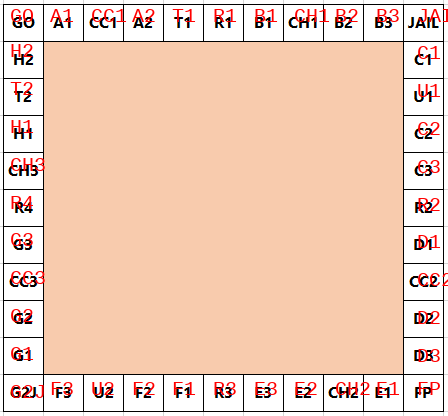

In [75]:
# Open an Image
img = orig_img.copy()

myfont = ImageFont.truetype(r'/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', 20)

# myfont = ImageFont.truetype("arial.ttf", 1)
 
# Call draw Method to add 2D graphics in an image
I1 = ImageDraw.Draw(img) 

mysq = 0

for i in range(4):
  
  
  if i == 0:
    print ('walk right 0 to 9')
    for sq in range(10):
      x = 40.7*sq + 10
      y = 37.8*i + 5

      m = lst_monopoly_squares[mysq]
      mysq+=1

      
      I1.text((x, y),f'{m}', font=myfont, fill =(255, 0, 0))

  if i == 1:
    print ('walk down 0 to 9')
   
    for sq in range(10):
      x = 40.7*10 + 10
      y = 37.8*sq + 5
      m = lst_monopoly_squares[mysq]
      mysq+=1      
      I1.text((x, y),f'{m}',font=myfont, fill =(255, 0, 0))

  if i == 2:
    print ('walk left 0 to 9')

    for sq in range(10, 0, -1):
      x = 40.7*sq + 10
      y = 37.8*10 #+ 5
      m = lst_monopoly_squares[mysq]
      mysq+=1      
      I1.text((x, y),f'{m}', font=myfont,fill =(255, 0, 0))
  
  if i == 3:
    print ('walk up 0 to 9')

    for sq in range(10, 0, -1):
      x = 40.7*0 + 10
      y = 37.8*sq + 3
      m = lst_monopoly_squares[mysq]
      mysq+=1      
      I1.text((x, y),f'{m}', font=myfont,fill =(255, 0, 0))

 # Display edited image
img

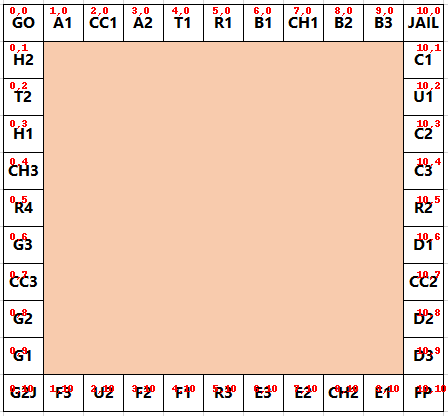

In [42]:
# Open an Image
img = orig_img.copy()
 
# Call draw Method to add 2D graphics in an image
I1 = ImageDraw.Draw(img)

for sq in range(40):
  
  x = 40.7*i + 10
  for j in range(11):
    if (i >=1 and i <= 9) and (j>=1 and j<=9):
      continue
    
  
    y = 37.8*j + 5

    I1.text((x, y), f'{i},{j}', fill =(255, 0, 0))
  
# Display edited image
img


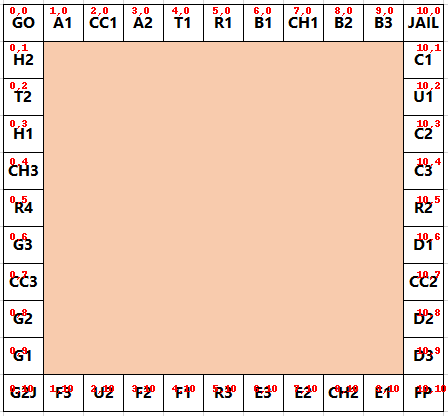

In [41]:
# Open an Image
img = orig_img.copy()
 
# Call draw Method to add 2D graphics in an image
I1 = ImageDraw.Draw(img)
 
# Custom font style and font size
# myFont = ImageFont.truetype('FreeMono.ttf', 65)
 
# Add Text to an image

for i in range(11):
  x = 40.7*i + 10
  for j in range(11):
    if (i >=1 and i <= 9) and (j>=1 and j<=9):
      continue
    
  
    y = 37.8*j + 5

    I1.text((x, y), f'{i},{j}', fill =(255, 0, 0))
  
# Display edited image
img


## Simple Test1

In [ ]:
mylist = [5, 15, 25, 35]

currno = 36

if currno > mylist[-1]:
    selection = mylist[0]
else:    
    for i in mylist:
        if currno > i:
            continue
        else:
            selection = i
            break

print(selection)
    

## Test Markdown

Clicking on each link jumps you to the section that is marked. It is really intuitive to use! 
I would recommend adding a table of contents to any of your published notebooks, so that the reader doesn't get lost.
You would want everyone to enjoy reading that kernel that you spent so long on!

Links use HTML to target your browser to that specific section of your Kaggle notebook.
To see the inner workings and code, please fork this notebook and click on the cells to see the markdown code

* [Introduction](#section-one)
* [Body](#section-two)
    - [Subsectionaaa 1](#subsection-one)
    - [Subsectionaaa 2](#anything-you-like)
* [Conclusionaaa](#section-three)

## Logging Test

In [ ]:
# 'application' code
logger.debug('debug message')
logger.info('info message')
logger.info('warn message')
logger.error('error message')
logger.critical('critical message')